In [234]:
# Data Collection and Preparation
# Data Ingestion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
# loading train dataset
url1 = 'https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv'
# url2 = 'https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_test.csv'

In [236]:
data1 = pd.read_csv(url1)
# data2 = pd.read_csv(url2)

In [237]:
data1.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


From the dataset, the following observation was noted after checking out for the first 20 columns


In Dependents column,  i notice that there are strange values in this columns (e.g 3+). 


There are possible outliers in Applicantincome.


There are possible outliers in Coapplicantincome.



There are possible outlier in LoanAmount.




There are also missing values in SelfEmployed column.




In [238]:
data1.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Observation from the tail view of the dataset

Dependent, SelfEmploy, LoanAmount has missing values in its columns



There are widely spread values in Applicant, Coapplicants and LoanAmount







In [239]:
# checking for missing values, duplicates and data type inconsistencies
data1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [240]:
# Clean the dataset by handling missing values, correcting data type and addressing data type
# married has just 3 missing values(rows) out of 614 rows
data1[data1["Married"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [241]:
data1.dropna(subset=["Married"], inplace=True)

From the Home Loan dataset, there are three(3) missing values in the Married row and so therefore the three rows are dropped here.

In [242]:
data1["Married"].isna().sum()

np.int64(0)

In [243]:
data1.dropna(subset=["Gender"], inplace=True)

In [244]:
data1["Gender"].isna().sum()

np.int64(0)

From the Home Loan dataset, Gender column has 13 missing values therefore the missings values were dropped here

In [245]:
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [246]:
data1.dropna(subset=["Loan_Amount_Term"], inplace=True)

In [247]:
data1["Loan_Amount_Term"].isna().sum()

np.int64(0)

From the Home Loan dataset, Loan Amount Term column has 14 missing values therefore the missings values were dropped here

In [248]:
data1.dropna(subset=["Dependents"], inplace=True)

In [249]:
data1["Dependents"].isna().sum()

np.int64(0)

From the Home Loan dataset, Dependent colum has 15 missing values therefore the missings values were dropped here

In [250]:
data1.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [251]:
# Filling missing numbers using mean, median or mode
data1["LoanAmount"] = data1["LoanAmount"].fillna(data1["LoanAmount"].mean())


In [252]:
data1.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [253]:
data1["Self_Employed"] = data1["Self_Employed"].fillna(data1["Self_Employed"].mode()[0])
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.001808,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [254]:
data1["Self_Employed"].isna().sum()

np.int64(0)

In [255]:
data1["Self_Employed"].dtypes

dtype('O')

From the dataset, Self Employed column has 32 missing values, because of the number of the missing values i will be filling it with mode.

In [256]:
data1["Credit_History"]= data1["Credit_History"].fillna(data1["Credit_History"].median())
data1["Credit_History"].isna().sum()

np.int64(0)

Observation from the dataset, credit_History has 50 missing values and due to the numbers of the missing values i decided to fill the missing values with median

### Exploratory Data Analysis (EDA)

### Descriptive Data Analysis

In [257]:
# To know the values in our dataset columns
data1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [258]:
# To get all information of our dataset.
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            573 non-null    object 
 1   Gender             573 non-null    object 
 2   Married            573 non-null    object 
 3   Dependents         573 non-null    object 
 4   Education          573 non-null    object 
 5   Self_Employed      573 non-null    object 
 6   ApplicantIncome    573 non-null    int64  
 7   CoapplicantIncome  573 non-null    float64
 8   LoanAmount         573 non-null    float64
 9   Loan_Amount_Term   573 non-null    float64
 10  Credit_History     573 non-null    float64
 11  Property_Area      573 non-null    object 
 12  Loan_Status        573 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.7+ KB


From the dataset , i observe that  we have 13 columns with  573 rows .The dtype are float64(4), int64(1), object(8)

In [259]:
data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,573.000000,573.000000,573.000000,573.000000,573.000000
mean,5328.514834,1641.359372,146.001808,341.675393,0.869110
std,5909.329219,3001.139055,82.569519,65.186012,0.337575
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,129.000000,360.000000,1.000000
75%,5815.000000,2302.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [260]:
data1.nunique

<bound method DataFrame.nunique of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849       

In [261]:
data1.shape

(573, 13)

This reveal the total number of rows and columns in the dataset. we have 573 rows and 13 columns

In [262]:
data1.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

This is cleared that the dataset is well cleaned without any missing values in the rows and columns

## Exploratory Analysis

In [263]:

data1["LoanAmount"].fillna(data1["LoanAmount"].mean())

data1["Self_Employed"].fillna(data1["LoanAmount"].mean())
data1["Credit_History"].fillna(data1["LoanAmount"].mean())

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 573, dtype: float64

## Visualisation Distributions  of numerical Features

Univariate analysis

<Axes: xlabel='LoanAmount', ylabel='Count'>

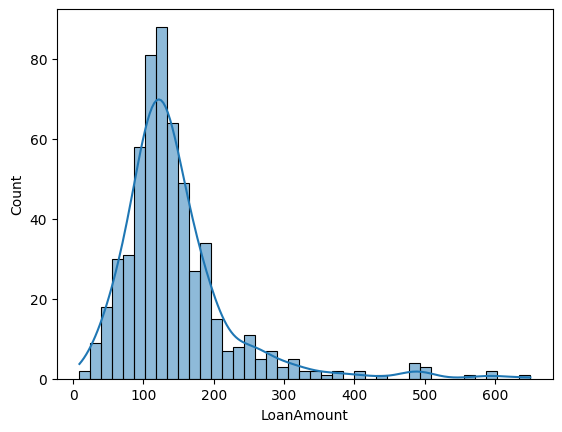

In [264]:
import seaborn as sns
sns.histplot(data1["LoanAmount"], kde=True)

<Axes: xlabel='Married', ylabel='count'>

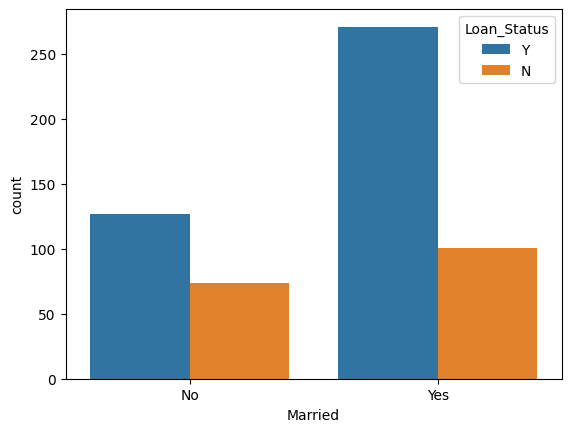

In [265]:
sns.countplot(x="Married", hue="Loan_Status", data=data1)

<Axes: xlabel='Property_Area', ylabel='count'>

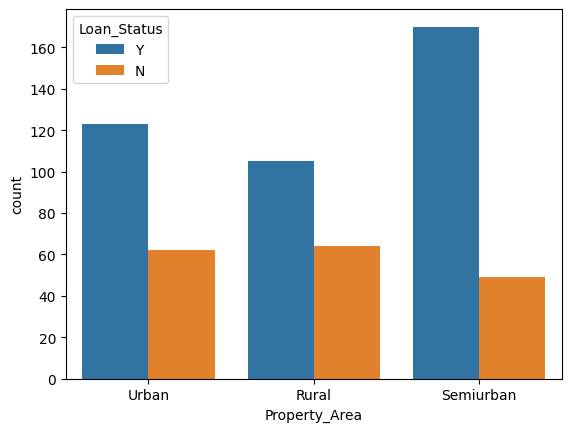

In [266]:
sns.countplot(x="Property_Area", hue="Loan_Status", data=data1)

<Axes: xlabel='Self_Employed', ylabel='count'>

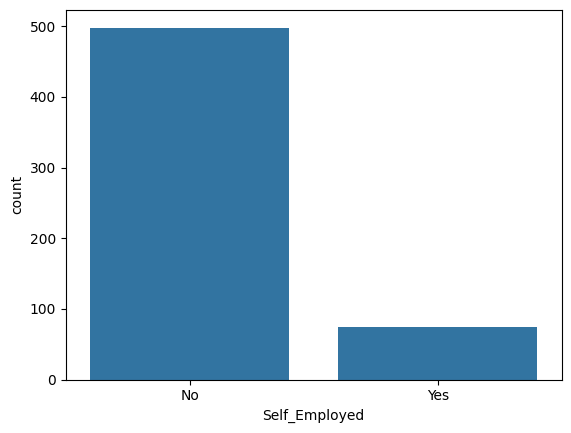

In [267]:
sns.countplot(x="Self_Employed", data=data1)

### Correlation Analysis

In [268]:
def num_univariate_analysis(data1, feature):
    skewness = data1[feature].skew()
    kurtosis = data1[feature].kurt()

    print("--"*40)
    print(f"\n Analysis for {feature}")
    print("=="*40)
    


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data1[feature], kde=True, color="teal")
    plt.title(f"\nHistplot analysis for {feature}\n")
    plt.xlabel(f"\n{feature}\n")
    plt.ylabel(f"\nFrequency\n")


    plt.subplot(1, 2, 2)
    sns.boxplot(data1[feature], color="blueviolet")
    plt.title(f"\n Boxplot for {feature}\n")
    plt.xlabel(f"\n{feature}\n")
    plt.ylabel(f"\nFrequency\n")

    plt.tight_layout()
    plt.show()


    print(f"{feature} feature skewness: {skewness:.3f}")
    print(f"{feature} feature kurtosis: {kurtosis:.3f}")

    if skewness > 1:
        print(f"{feature} values set are highly skewed")
    elif skewness > 0.5:
        print(f"{feature} values set are Moderately skewed")
    else :
        print(f"{feature} values set are Slightly skewed\n")

In [269]:
# lets pick out the numerical columns and get the descriptions
num_features = data1.select_dtypes(include=['float64', 'int64']).columns
data1[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,573.0,5328.514834,5909.329219,150.0,2876.0,3812.0,5815.0,81000.0
CoapplicantIncome,573.0,1641.359372,3001.139055,0.0,0.0,1210.0,2302.0,41667.0
LoanAmount,573.0,146.001808,82.569519,9.0,100.0,129.0,165.0,650.0
Loan_Amount_Term,573.0,341.675393,65.186012,12.0,360.0,360.0,360.0,480.0
Credit_History,573.0,0.869110,0.337575,0.0,1.0,1.0,1.0,1.0


In [270]:

def univariate_numerical_eda(data1, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    print(f" Feature: {column}")
    print("="*40)
    print(data1[column].describe().to_frame())
    print(f"\nSkewness: {data1[column].skew():.3f}")
    print(f"Kurtosis: {data1[column].kurt():.3f}")

    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(data1[column], kde=True, bins=30, color='teal')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data1[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    # Optional note on transformation
    if abs(data1[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(data1[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")

 Feature: Credit_History
       Credit_History
count      573.000000
mean         0.869110
std          0.337575
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000

Skewness: -2.194
Kurtosis: 2.826


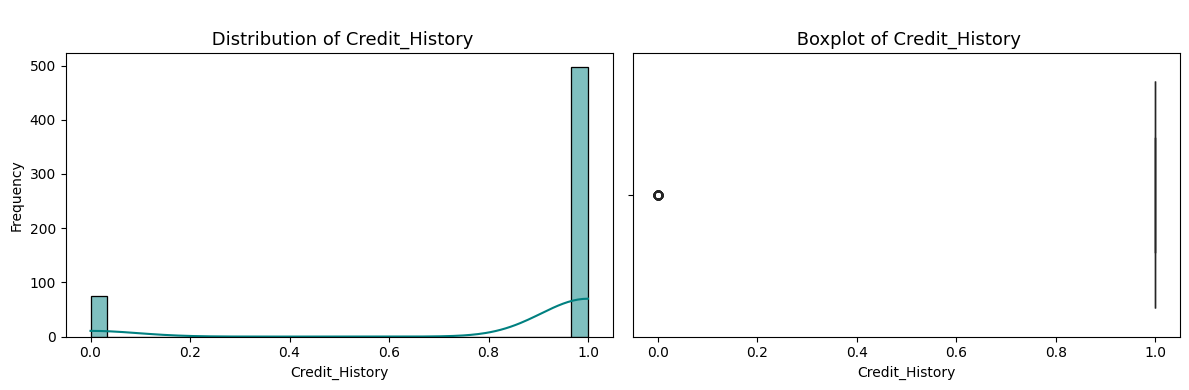


 Credit_History is highly skewed. Consider log or Box-Cox transformation.


In [271]:
# 1. 
univariate_numerical_eda(data1, 'Credit_History')

 Feature: ApplicantIncome
       ApplicantIncome
count       573.000000
mean       5328.514834
std        5909.329219
min         150.000000
25%        2876.000000
50%        3812.000000
75%        5815.000000
max       81000.000000

Skewness: 6.868
Kurtosis: 68.292


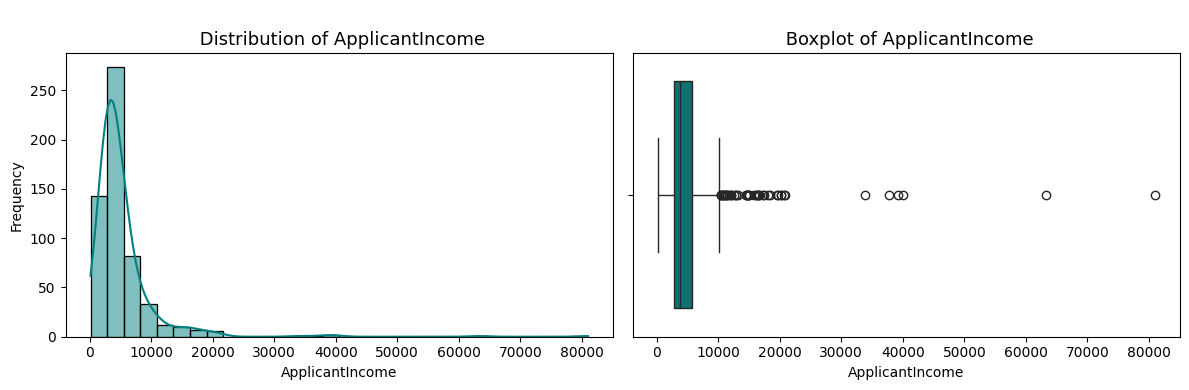


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: CoapplicantIncome
       CoapplicantIncome
count         573.000000
mean         1641.359372
std          3001.139055
min             0.000000
25%             0.000000
50%          1210.000000
75%          2302.000000
max         41667.000000

Skewness: 7.421
Kurtosis: 82.046


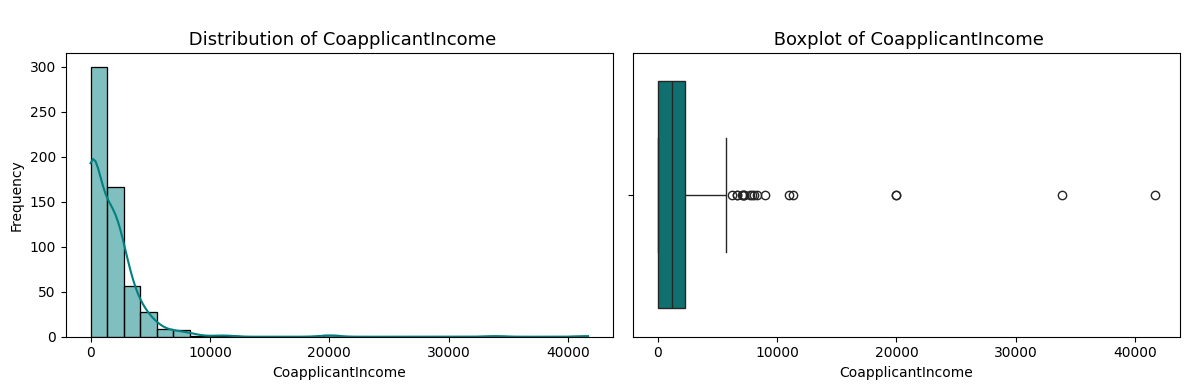


 CoapplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: LoanAmount
       LoanAmount
count  573.000000
mean   146.001808
std     82.569519
min      9.000000
25%    100.000000
50%    129.000000
75%    165.000000
max    650.000000

Skewness: 2.531
Kurtosis: 9.355


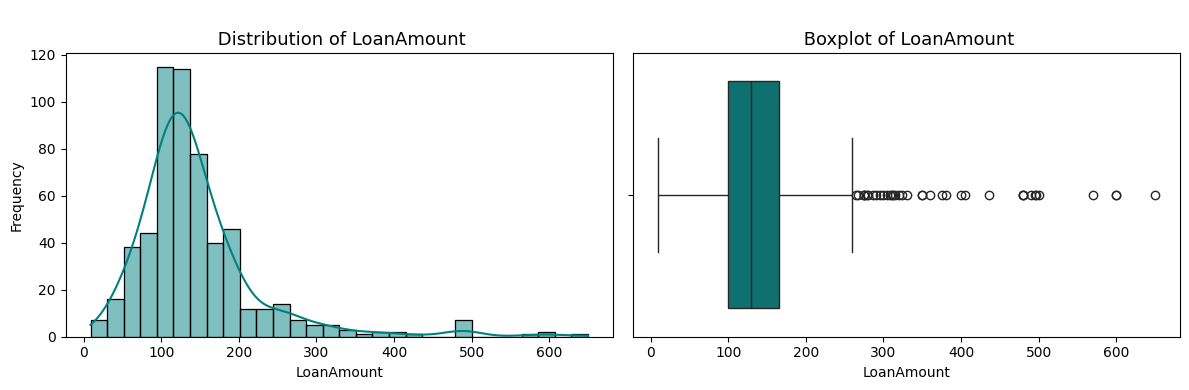


 LoanAmount is highly skewed. Consider log or Box-Cox transformation.
 Feature: Loan_Amount_Term
       Loan_Amount_Term
count        573.000000
mean         341.675393
std           65.186012
min           12.000000
25%          360.000000
50%          360.000000
75%          360.000000
max          480.000000

Skewness: -2.425
Kurtosis: 6.828


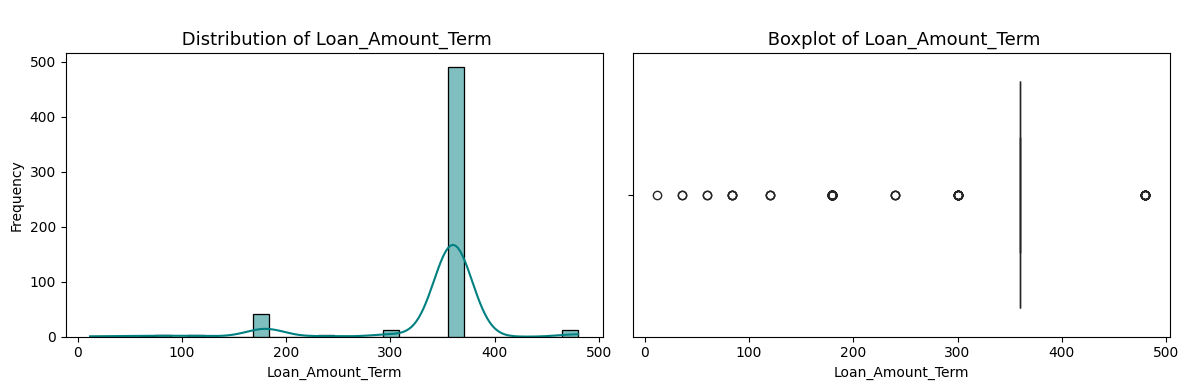


 Loan_Amount_Term is highly skewed. Consider log or Box-Cox transformation.
 Feature: Credit_History
       Credit_History
count      573.000000
mean         0.869110
std          0.337575
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000

Skewness: -2.194
Kurtosis: 2.826


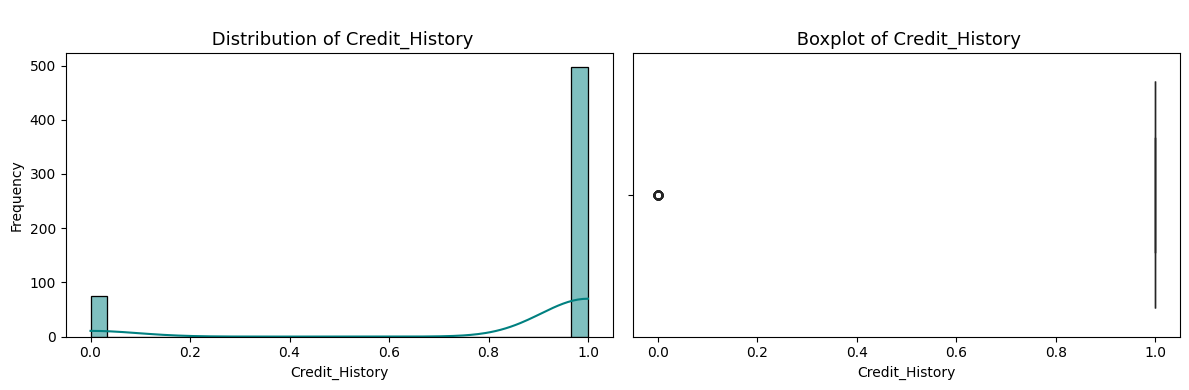


 Credit_History is highly skewed. Consider log or Box-Cox transformation.


In [272]:
# We can loop to save time
for col in num_features:
    univariate_numerical_eda(data1, col)

In [273]:
# cat_features= data1.select_dtypes(include='object')
# lets pick out the numerical columns and get the descriptions
cat_features= data1.select_dtypes(include='object').columns
data1[cat_features].describe().T

,count,unique,top,freq
Loan_ID,573,573,LP001002,1
Gender,573,2,Male,467
Married,573,2,Yes,372
Dependents,573,4,0,327
Education,573,2,Graduate,450
Self_Employed,573,2,No,498
Property_Area,573,3,Semiurban,219
Loan_Status,573,2,Y,398


In [274]:
def categorical_univariate_analysis(data1, feature):
    

    print("--"*40)
    print(f"\n Analysis for {feature}")
    print("=="*40)
    
    

    plt.figure(figsize=(8, 4))
    sns.countplot(x="Self_Employed", data1=data1, color="blueviolet")
    plt.title(f"\nCountplot for {feature}\n")
    plt.xlabel(f"\n{feature}\n")
    plt.ylabel(f"\nFrequency\n")

    plt.tight_layout()
    plt.show()

In [275]:
def univariate_categorical_eda(data1, column):
    """
    Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, and a countplot.
    """
    print(f"Feature: {column}")
    print("="*40)

    # Frequency + proportion
    freq = data1[column].value_counts()
    prop = data1[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    print()

    # Visualization
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=column, data=data1, palette='Set2', order=freq.index,color='teal')
    plt.title(f'Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Count')

    # Annotate each bar with percentage
    total = len(data1[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f'{(height/total)*100:.1f}%', ha='center')

    plt.tight_layout()
    plt.show()

Feature: Education
              Count  Percentage
Education                      
Graduate        450       78.53
Not Graduate    123       21.47



C:\Users\User\AppData\Local\Temp\ipykernel_7216\29574690.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=data1, palette='Set2', order=freq.index,color='teal')


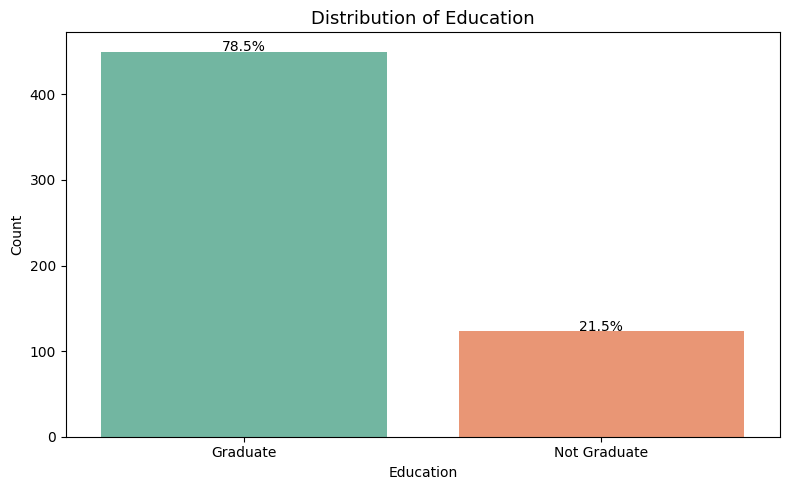

In [276]:
univariate_categorical_eda(data1,"Education" )

Feature: Self_Employed
               Count  Percentage
Self_Employed                   
No               498       86.91
Yes               75       13.09



C:\Users\User\AppData\Local\Temp\ipykernel_7216\29574690.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=data1, palette='Set2', order=freq.index,color='teal')


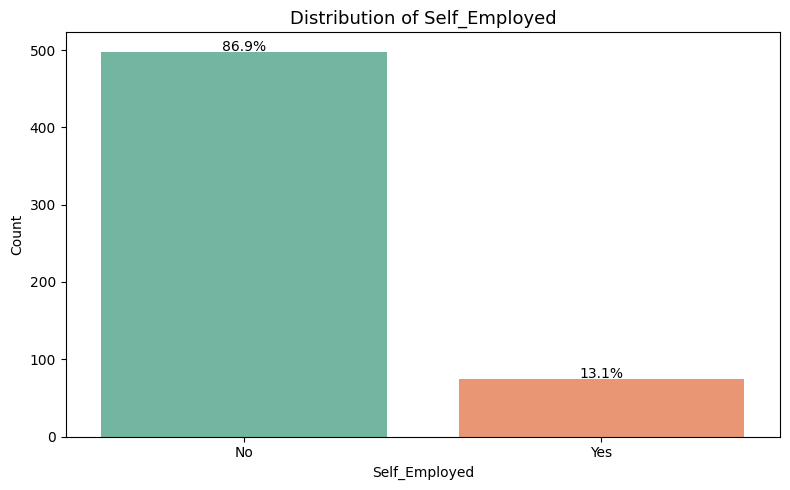

In [277]:
univariate_categorical_eda(data1,"Self_Employed" )

Feature: Property_Area
               Count  Percentage
Property_Area                   
Semiurban        219       38.22
Urban            185       32.29
Rural            169       29.49



C:\Users\User\AppData\Local\Temp\ipykernel_7216\29574690.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=data1, palette='Set2', order=freq.index,color='teal')


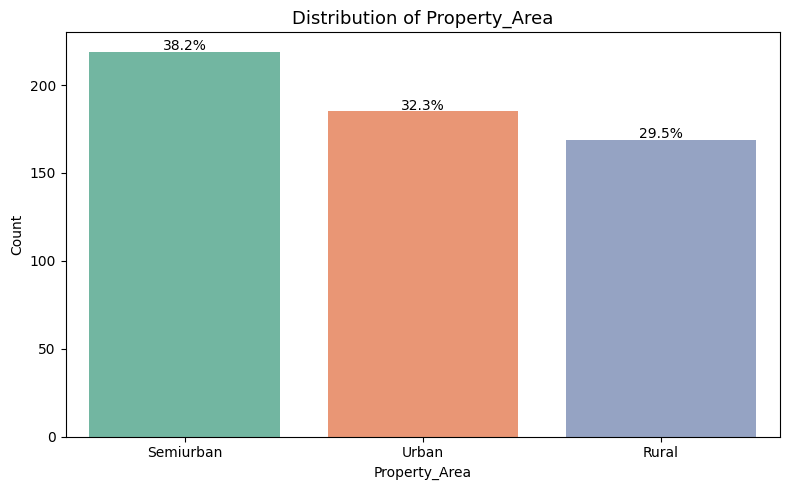

In [278]:
univariate_categorical_eda(data1,"Property_Area" )

Bivariate Analysis

<Axes: xlabel='Education', ylabel='count'>

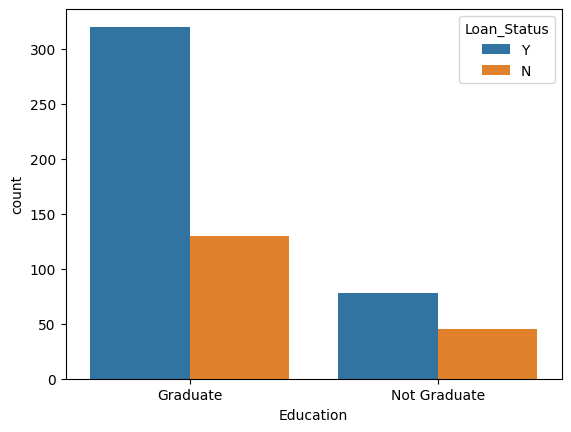

In [279]:
sns.countplot(x="Education", hue="Loan_Status", data=data1)

<Axes: xlabel='Gender', ylabel='count'>

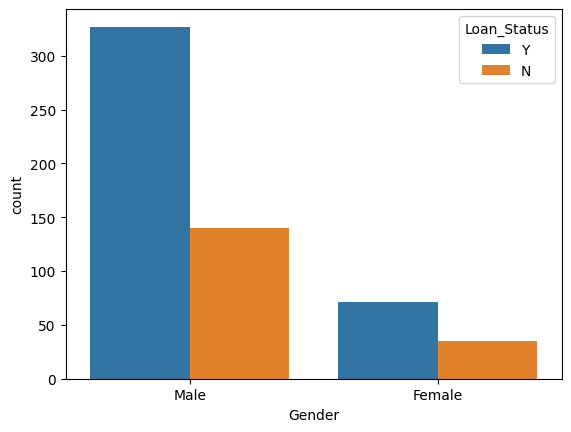

In [280]:
sns.countplot(x="Gender", hue="Loan_Status", data=data1)

<Axes: xlabel='Credit_History', ylabel='count'>

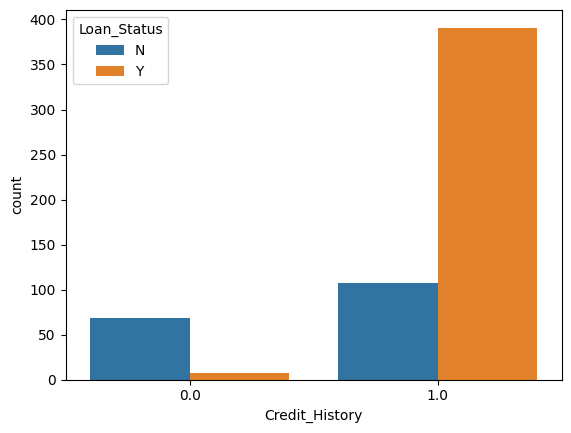

In [281]:
sns.countplot(x="Credit_History", hue="Loan_Status", data=data1)

<Axes: xlabel='Credit_History', ylabel='count'>

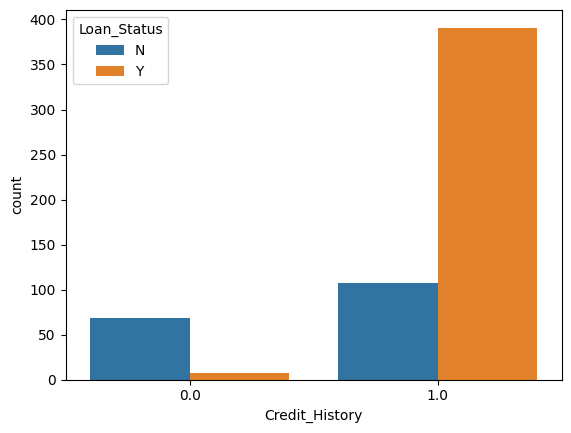

In [282]:
sns.countplot(x="Credit_History", hue="Loan_Status", data=data1)

In [283]:
# lets find the numerical features
num_features = data1.select_dtypes(['number']).columns
num_features

num_features = pd.DataFrame(data1[num_features])
num_features.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.001808,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0


Numeric to Numeric

Correlation with Each  Columns

In [284]:
def correlation_with_target(data1, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    numeric_df = data1.select_dtypes(include='number').copy()
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")

    # compute correlations of every numeric column with the target
    corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)


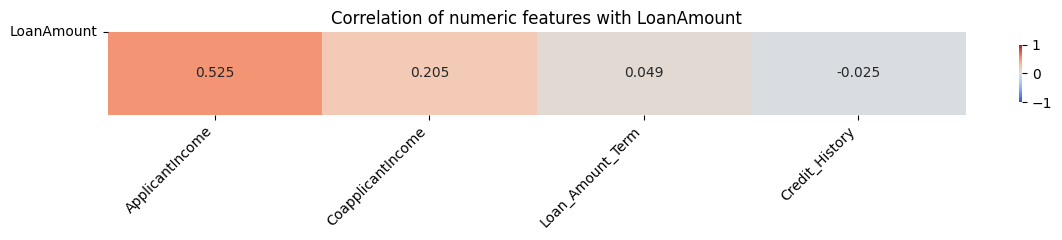

ApplicantIncome      0.525325
CoapplicantIncome    0.205021
Loan_Amount_Term     0.048743
Credit_History      -0.024641
dtype: float64


In [285]:
corr_series = correlation_with_target(data1, 'LoanAmount', figsize=(12,2.5))
print(corr_series) 

In [286]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(data1, x_col, y_col):
    """
    Plots the relationship between two numeric variables with a regression line
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """

    # Calculate correlation coefficient
    corr, p_value = pearsonr(data1[x_col],data1[y_col])

    # Create plot
    plt.figure(figsize=(8, 5))
    sns.regplot(data=data1, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    # Title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()


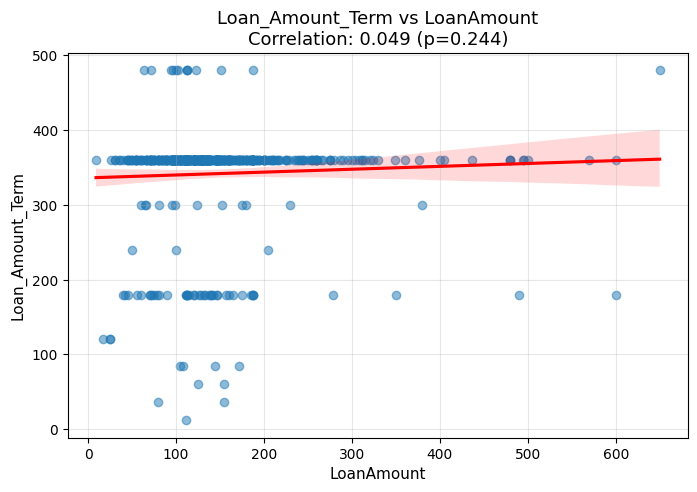

In [287]:
numeric_bivariate_plot(data1, 'LoanAmount', 'Loan_Amount_Term')


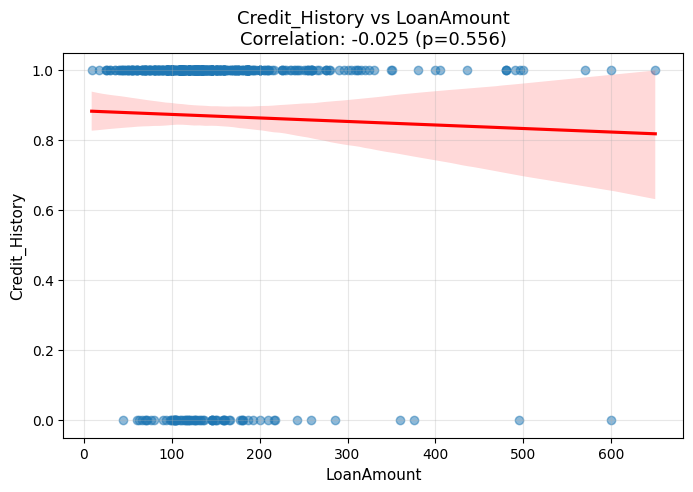

In [288]:
numeric_bivariate_plot(data1, 'LoanAmount', 'Credit_History')

In [ ]:
data1.to_csv('file')

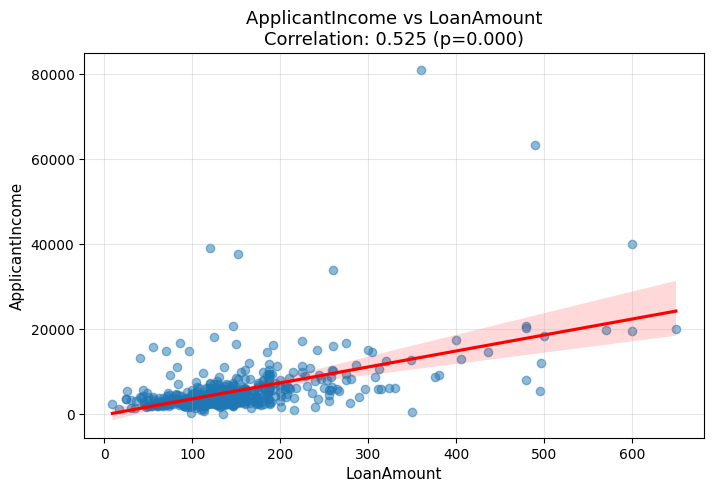

In [290]:
numeric_bivariate_plot(data1, 'LoanAmount', 'ApplicantIncome')